In [1]:
import pandas_datareader as pdr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as smf
from datetime import datetime

In [2]:
!pip install pandas_datareader

In [3]:
df=pd.read_csv('/content/exchange_rate.csv')

In [4]:
df

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     7588 non-null   object 
 1   Ex_rate  7588 non-null   float64
dtypes: float64(1), object(1)
memory usage: 118.7+ KB


In [6]:
df['date']=pd.to_datetime(df['date'],format="%d-%m-%Y %H:%M")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     7588 non-null   datetime64[ns]
 1   Ex_rate  7588 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 118.7 KB


<Axes: >

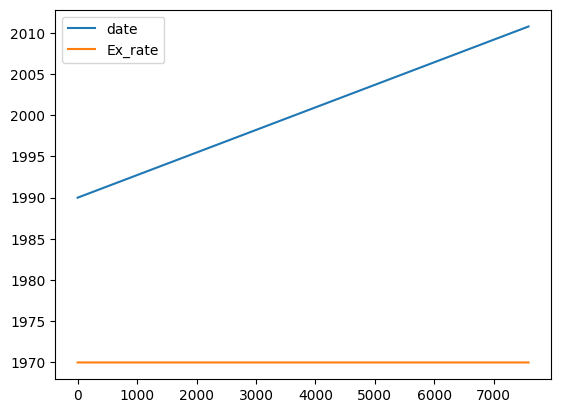

In [8]:
df.plot()

In [9]:
df.set_index('date',inplace=True)

In [10]:
df

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [11]:
from statsmodels.tsa.stattools import adfuller

<Axes: xlabel='date'>

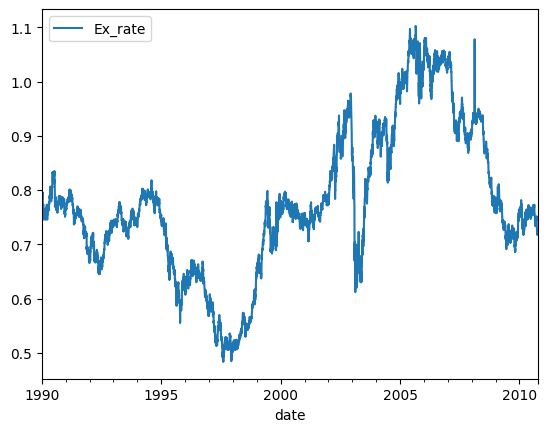

In [12]:
df.plot()

In [13]:
##check the stationarity of data
#ACFplot AND PACFplot
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <=0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis,timeseries has no unit root indicates Data is stationary")
    else:
        print("weak evidence against nuoll hypothesis,timeseries has a unit root indicates Data is non-stationary")

In [14]:
adf_test(df['Ex_rate'])

ADF Statistics: -1.6649941807382342
p-value: 0.4492327353597477
weak evidence against nuoll hypothesis,timeseries has a unit root indicates Data is non-stationary


In [15]:
df['Ex_rate_first']=df['Ex_rate']-df['Ex_rate'].shift(1)

In [16]:
df['Ex_rate_first'].isnull().sum()

1

In [17]:
df['Ex_rate_first'].dropna()

,Ex_rate_first
date,
1990-01-02,-0.003700
1990-01-03,0.004900
1990-01-04,-0.000700
1990-01-05,-0.001100
1990-01-06,0.001700
...,...
2010-10-06,-0.000207
2010-10-07,0.003345
2010-10-08,0.001358


In [19]:
adf_test(df['Ex_rate_first'].dropna())

ADF Statistics: -99.39343120118632
p-value: 0.0
strong evidence against the null hypothesis, reject the null hypothesis,timeseries has no unit root indicates Data is stationary


In [20]:
df

,Ex_rate,Ex_rate_first
date,,
1990-01-01,0.785500,NaN
1990-01-02,0.781800,-0.003700
1990-01-03,0.786700,0.004900
1990-01-04,0.786000,-0.000700
1990-01-05,0.784900,-0.001100
...,...,...
2010-10-06,0.718494,-0.000207
2010-10-07,0.721839,0.003345
2010-10-08,0.723197,0.001358


In [21]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

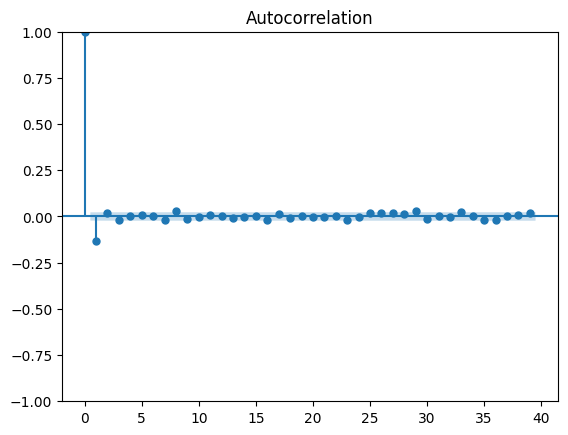

In [22]:
acf=plot_acf(df['Ex_rate_first'].dropna())

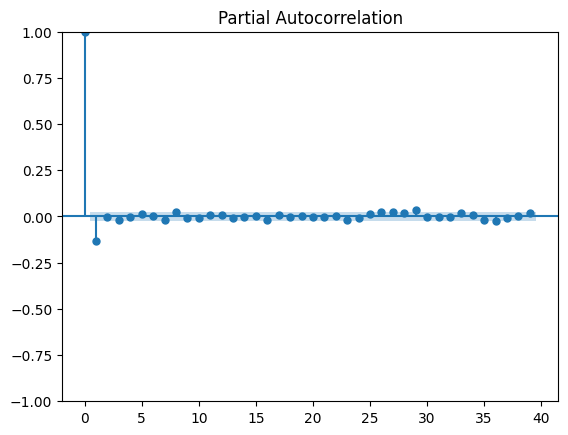

In [23]:
pacf=plot_pacf(df['Ex_rate_first'].dropna())

In [24]:
df['EX_rate_twelve']=df['Ex_rate']-df['Ex_rate'].shift(12)

In [25]:
df['EX_rate_twelve']

,EX_rate_twelve
date,
1990-01-01,NaN
1990-01-02,NaN
1990-01-03,NaN
1990-01-04,NaN
1990-01-05,NaN
...,...
2010-10-06,-0.012073
2010-10-07,-0.007875
2010-10-08,-0.006517


In [26]:
df

,Ex_rate,Ex_rate_first,EX_rate_twelve
date,,,
1990-01-01,0.785500,NaN,NaN
1990-01-02,0.781800,-0.003700,NaN
1990-01-03,0.786700,0.004900,NaN
1990-01-04,0.786000,-0.000700,NaN
1990-01-05,0.784900,-0.001100,NaN
...,...,...,...
2010-10-06,0.718494,-0.000207,-0.012073
2010-10-07,0.721839,0.003345,-0.007875
2010-10-08,0.723197,0.001358,-0.006517


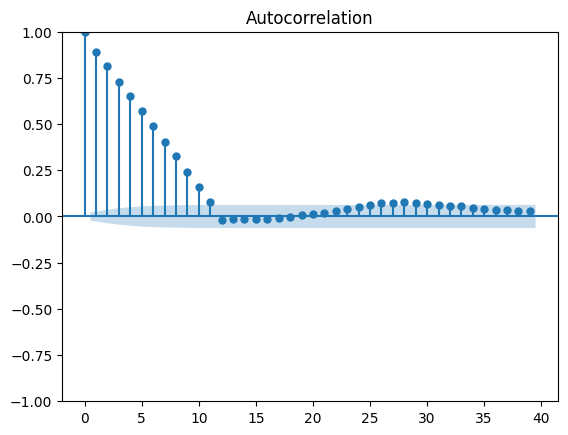

In [27]:
acf=plot_acf(df['EX_rate_twelve'].dropna())

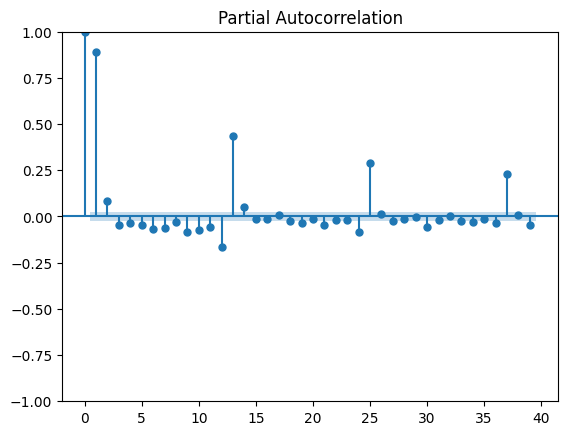

In [28]:
pacf=plot_pacf(df['EX_rate_twelve'].dropna())

In [29]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2005,10,10)
test_dataset_end=datetime(2010,10,10)

In [30]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [31]:
##prediction
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]

In [32]:
from statsmodels.tsa.arima_model import ARIMA

In [33]:
train_data

,Ex_rate,Ex_rate_first,EX_rate_twelve
date,,,
1990-01-01,0.785500,NaN,NaN
1990-01-02,0.781800,-0.003700,NaN
1990-01-03,0.786700,0.004900,NaN
1990-01-04,0.786000,-0.000700,NaN
1990-01-05,0.784900,-0.001100,NaN
...,...,...,...
2005-10-06,1.046047,-0.013601,-0.002182
2005-10-07,1.028045,-0.018002,-0.017947
2005-10-08,1.033805,0.005760,-0.010167


In [34]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima.model import ARIMA
import numpy

In [35]:
model_ARIMA=ARIMA(train_data['Ex_rate'],order=(5,1,3))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [36]:
model_Arima_fit=model_ARIMA.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [37]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Ex_rate   No. Observations:                 5762
Model:                 ARIMA(5, 1, 3)   Log Likelihood               21702.858
Date:                Sun, 16 Mar 2025   AIC                         -43387.715
Time:                        16:33:08   BIC                         -43327.786
Sample:                    01-01-1990   HQIC                        -43366.861
                         - 10-10-2005                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.181e-06      0.002     -0.000      1.000      -0.005       0.005
ar.L2       4.033e-07      0.004      0.000      1.000      -0.007       0.007
ar.L3      -7.566e-07      0.003     -0.000      1.000      -0.007       0.007
ar.L4       2.213e-07      0.009   2.48e-05      1.000      -0.018       0.018
ar.L5        3.83e-07      0.009   4.39e-05      1.000      -0.017       0.017
ma.L1      -1.181e-06      0.002     -0.000      1.000      -0.005       0.005
ma.L2        4.03e-07      0.004      0.000      1.000      -0.007       0.007
ma.L3      -7.568e-07      0.003     -0.000      1.000      -0.007       0.007
sigma2      3.128e-05   1.99e-07    157.449      0.000    3.09e-05    3.17e-05
===================================================================================
Ljung-Box (L1) (Q):                  14.38   Jarque-Bera (JB):            130799.09
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.58   Skew:                            -0.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        26.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.39e+18. Standard errors may be unstable.
"""

In [38]:
pred_start_date=test_data.index[0]
pred_end_date=test_data.index[-1]
print(pred_start_date)
print(pred_end_date)

2005-10-11 00:00:00
2010-10-10 00:00:00


In [39]:
pred=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
residuals=test_data['Ex_rate']-pred

In [40]:
pred

,predicted_mean
2005-10-11,1.036452
2005-10-12,1.036452
2005-10-13,1.036452
2005-10-14,1.036452
2005-10-15,1.036452
...,...
2010-10-06,1.036452
2010-10-07,1.036452
2010-10-08,1.036452
2010-10-09,1.036452


In [41]:
residuals

,0
date,
2005-10-11,-0.017250
2005-10-12,-0.013643
2005-10-13,-0.061508
2005-10-14,-0.055001
2005-10-15,-0.063689
...,...
2010-10-06,-0.317958
2010-10-07,-0.314613
2010-10-08,-0.313255


<Axes: ylabel='Density'>

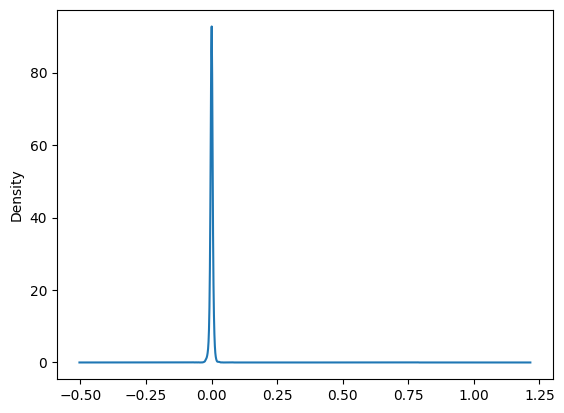

In [42]:
model_Arima_fit.resid.plot(kind='kde')

In [43]:
test_data['Predicted_ARIMA']=pred

<ipython-input-43-69896c9f46c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA']=pred


<Axes: xlabel='date'>

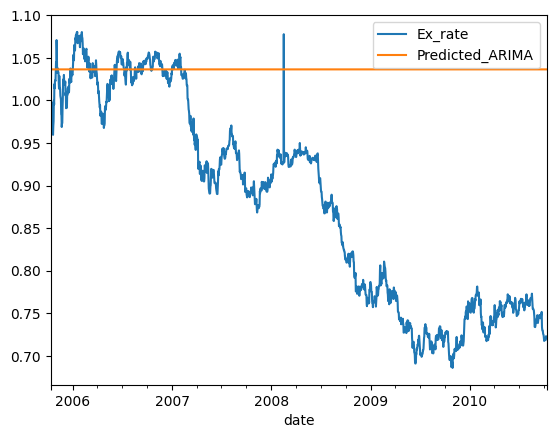

In [44]:
test_data[['Ex_rate','Predicted_ARIMA']].plot()

In [49]:
##create a SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model_SARIMA=smf.tsa.statespace.SARIMAX(train_data['Ex_rate'],order=(3,0,6),seasonal_order=(0,1,0,12))

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [50]:
model_SARIMAX_fit=model_SARIMA.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [51]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                             Ex_rate   No. Observations:                 5762
Model:             SARIMAX(3, 0, 6)x(0, 1, [], 12)   Log Likelihood               19876.402
Date:                             Sun, 16 Mar 2025   AIC                         -39732.804
Time:                                     16:40:48   BIC                         -39666.234
Sample:                                 01-01-1990   HQIC                        -39709.636
                                      - 10-10-2005                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1959      0.347      0.565      0.572      -0.483       0.875
ar.L2          0.2570      0.139      1.850      0.064      -0.015       0.529
ar.L3          0.2553      0.169      1.512      0.130      -0.076       0.586
ma.L1          0.6562      0.348      1.885      0.059      -0.026       1.338
ma.L2          0.4652      0.204      2.281      0.023       0.065       0.865
ma.L3          0.1194      0.068      1.768      0.077      -0.013       0.252
ma.L4          0.1775      0.046      3.862      0.000       0.087       0.268
ma.L5          0.1331      0.053      2.508      0.012       0.029       0.237
ma.L6          0.0178      0.051      0.347      0.729      -0.083       0.118
sigma2      5.811e-05   4.93e-07    117.919      0.000    5.71e-05    5.91e-05
===================================================================================
Ljung-Box (L1) (Q):                  12.11   Jarque-Bera (JB):             31619.93
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               3.17   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [52]:
pred_Sarima=model_SARIMAX_fit.predict(start=datetime(2009,10,1),end=datetime(2010,10,10))
residuals=test_data['Ex_rate']-pred_Sarima

<Axes: xlabel='date'>

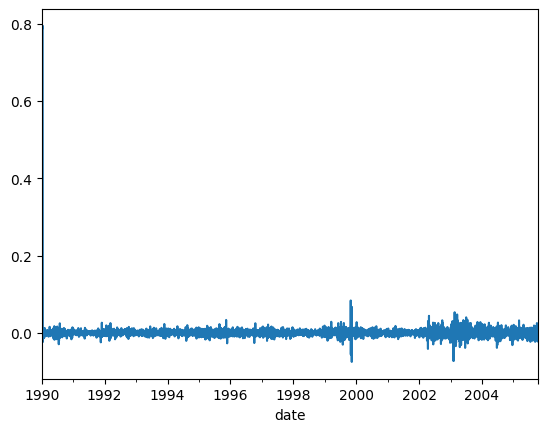

In [53]:
model_SARIMAX_fit.resid.plot()

In [54]:
test_data['Predicted_SARIMA']=pred

<ipython-input-54-11869fe00ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMA']=pred


<Axes: xlabel='date'>

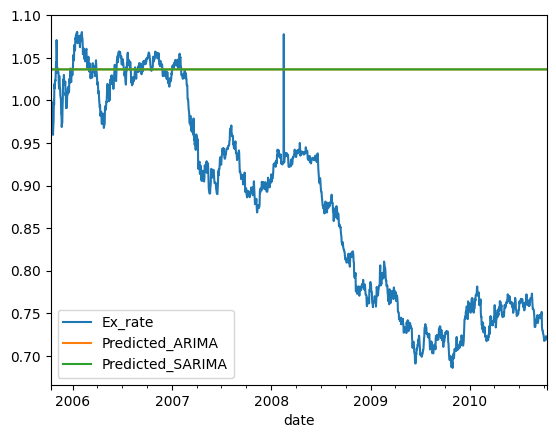

In [55]:
test_data[['Ex_rate','Predicted_ARIMA','Predicted_SARIMA']].plot()

In [56]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [58]:
ses_model = SimpleExpSmoothing(train_data['Ex_rate']).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_ses,test_data['Ex_rate'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


20.888676307613085

In [59]:
hwe_model_add_add = ExponentialSmoothing(train_data['Ex_rate'],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_add_add,test_data['Ex_rate'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


24.730640361899898

In [60]:
hwe_model_mul_add = ExponentialSmoothing(train_data['Ex_rate'],seasonal="mul",trend="add",seasonal_periods=12).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test_data.index[0],end = test_data.index[-1])
MAPE(pred_hwe_mul_add,test_data['Ex_rate'])

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


25.140928045325794

In [61]:
hwe_model_add_add = ExponentialSmoothing(df['Ex_rate'],seasonal="add",trend="add",seasonal_periods=12).fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [62]:
#Forecasting for next 10 time periods
hwe_model_add_add.forecast(10)

,0
2010-10-11,0.720812
2010-10-12,0.720594
2010-10-13,0.720259
2010-10-14,0.720518
2010-10-15,0.720356
2010-10-16,0.720478
2010-10-17,0.720538
2010-10-18,0.720243
2010-10-19,0.720424
2010-10-20,0.720465
